---
<div class="alert alert-success" data-title="">
  <h2><i class="fa fa-tasks" aria-hidden="true"></i> 사이킷런을 사용한 Boston 집값 예측
  </h2>
</div>

<img src = "https://cdn10.bostonmagazine.com/wp-content/uploads/sites/2/2018/05/boston-rent.jpg" width = "700" >


이번 실습 시간에 다뤄볼 데이터는 보스턴 시의 주택 가격과 관련된 데이터입니다.

- 주택 가격에 영향을 끼치는 여러 요소들 (X, Features)
- 주택 가격 (Y, Target)


## 목표 

- 주택의 가격에 영향을 미치는 요소를 분석
- 회귀분석

## 데이터 살펴보기 

In [1]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [2]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [3]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [7]:
boston.data.shape

(506, 13)

In [8]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [9]:
boston.target.shape

(506,)

## 변수설명 

1) Target (Y) data
* Target: 1978년 보스턴 주택 가격

2) Feature (X) data
* CRIM: 범죄율
* INDUS: 비소매상업지역 면적 비율
* NOX: 일산화질소 농도
* RM: 주택당 방 개수
* LSTAT: 인구 중 하위 계층 비율
* B: 인구 중 흑인 비율
* PTRATIO: 학생/교사 비율
* ZN: 25,000 평방피트를 초과하는 거주지역 비율
* CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0
* AGE: 1940년 이전에 건축된 주택의 비율
* RAD: 방사형 고속도로까지의 거리
* DIS: 직업센터의 거리
* TAX: 재산세율

---

In [4]:
import pandas as pd
boston_df = pd.DataFrame(boston.data, 
                         columns=boston.feature_names, 
                         index=range(1,len(boston.data)+1))
boston_df['PRICE'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
1,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
boston_df.shape

(506, 14)

## stats_model 을 사용하여 상관관계 확인하기 


In [6]:
# Feature data
rm = boston_df[['RM']]
# Target data
y_train = boston_df[['PRICE']]

In [7]:
import statsmodels.api as sm
X_train = sm.add_constant(rm, has_constant = 'add')
X_train.head()

,const,RM
1,1.0,6.575
2,1.0,6.421
3,1.0,7.185
4,1.0,6.998
5,1.0,7.147


In [8]:
# 선형 회귀 모델에 Target과 Feature를 넣기
single_model = sm.OLS(y_train, X_train)

# 모델 학습하기
fitted_model = single_model.fit()    # 우리가 만든 학습된 모델

In [9]:
# 학습의 결과를 확인해보기
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           2.49e-74
Time:                        10:04:55   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 결과 해석 

- R-squared가 0.484로 48%의 설명력을 갖는다. 
- P-value는 0.000으로 0.05보다 작은 유의미한 상태 (P>⎪t⎪에 해당)

<div class="alert alert-success" data-title="">
  <h2><i class="fa fa-tasks" aria-hidden="true"></i> 단순선형회귀 모델을 통한 관계분석
  </h2>
</div>


## X,y 설정하기 

In [10]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [12]:
X = pd.DataFrame(boston_df['RM']) # 2차원 배열로 만들기 위해서 DF로 만듬
X.head()

,RM
1,6.575
2,6.421
3,7.185
4,6.998
5,7.147


In [13]:
y = boston_df['PRICE']
y.head()

1    24.0
2    21.6
3    34.7
4    33.4
5    36.2
Name: PRICE, dtype: float64

## 학습 평가 데이터 나누기 

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                       test_size=0.3,
                                                       random_state = 42)

## 모델 학습

```python 
from sklearn.linear_model import LinearRegression
#1. model 정의
#2. fit 
#3. predict 
```

In [15]:
from sklearn.linear_model import LinearRegression
model= LinearRegression() # 저의 
model.fit(X_train,y_train) #  학습!!
y_pred = model.predict(X_test) # 예측값 

## 모델 평가 

```python 
from sklearn.metrics import mean_absolute_error # 1. MAE
from sklearn.metrics import mean_squared_error  # 2. MSE 
import numpy as np                              # 3. RMSE 
from sklearn.metrics import r2_score            # 4. R2_score
```

In [18]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

4.314224104076755

In [16]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test,y_pred)
mse

40.35144969787305

In [21]:
# rmse
np.sqrt(mse)

6.352279094771659

In [17]:
r2 = r2_score(y_test,y_pred)
r2

0.4584649934303068

In [19]:
# 추정된 회귀 모형의 회귀 계수 및 절편 값을 확인
# 회귀 계수는 coef_ 속성, 절편은 intercept_ 속성에 각각 값이 할당
print("회귀 계수 : ", model.coef_)
print("절편 : ",model.intercept_)

회귀 계수 :  [9.1181022]
절편 :  -34.662307438406785


## 데이터 시각화

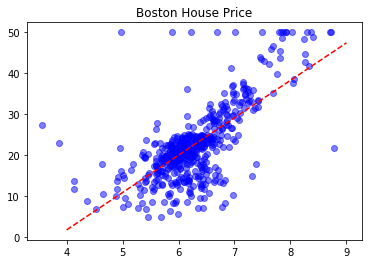

In [20]:
import matplotlib.pyplot as plt
x = range(4,10)
plt.title("Boston House Price")
plt.plot(X,y,'o',color = 'blue',alpha = 0.5)
plt.plot(x,model.coef_*x+model.intercept_,'--',color='red')
plt.show()